In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv(r'C:\Users\91636\OneDrive\Desktop\6th sem\ML\ML lab\datasets\advertising.csv')
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
median = data['Sales'].median()
data['Sales']=[1 if x> median else 0 for x in data['Sales']]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,1
1,44.5,39.3,45.1,0
2,17.2,45.9,69.3,0
3,151.5,41.3,58.5,1
4,180.8,10.8,58.4,1


In [3]:
target=data['Sales']
input=data.drop('Sales',axis='columns')
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.2,random_state=42)

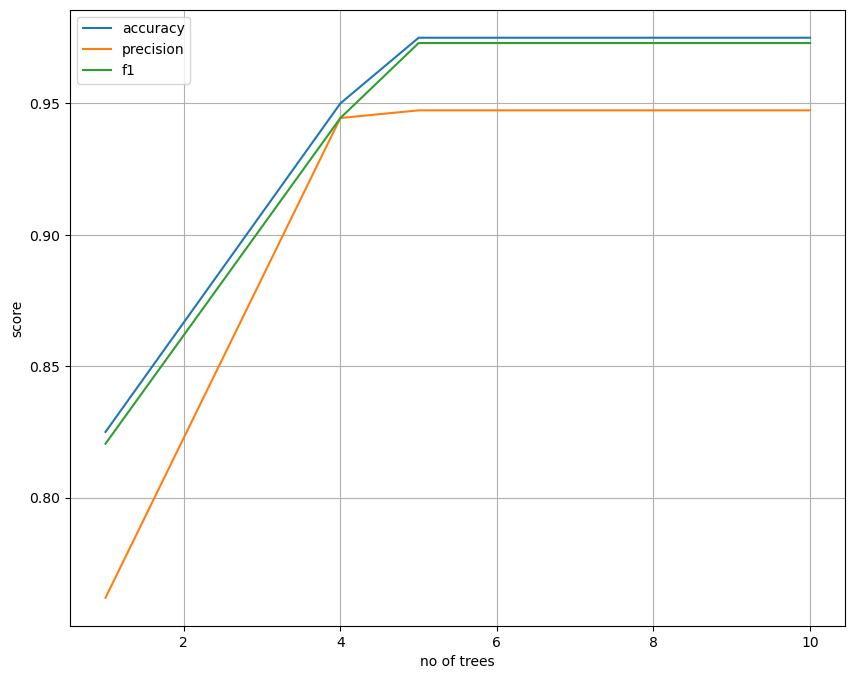

In [4]:
def ensemble_random_forest(n_tress):
  model=RandomForestClassifier(n_estimators=n_tress,criterion='entropy')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  acc=accuracy_score(y_test,y_pred)
  prec=precision_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  

  return acc,prec,f1

no_trees=[1,4,5,10]
ans={'acc':[],'prec':[],'f1':[]}
for i in no_trees:
  acc,prec,f1=ensemble_random_forest(i)
  ans['acc'].append(acc)
  ans['prec'].append(prec)
  ans['f1'].append(f1)
  


plt.figure(figsize=(10,8))
plt.plot(no_trees,ans['acc'],label='accuracy')
plt.plot(no_trees,ans['prec'],label='precision')
plt.plot(no_trees,ans['f1'],label='f1')
plt.xlabel('no of trees')
plt.ylabel('score')
plt.legend()
plt.grid(True)
plt.show()

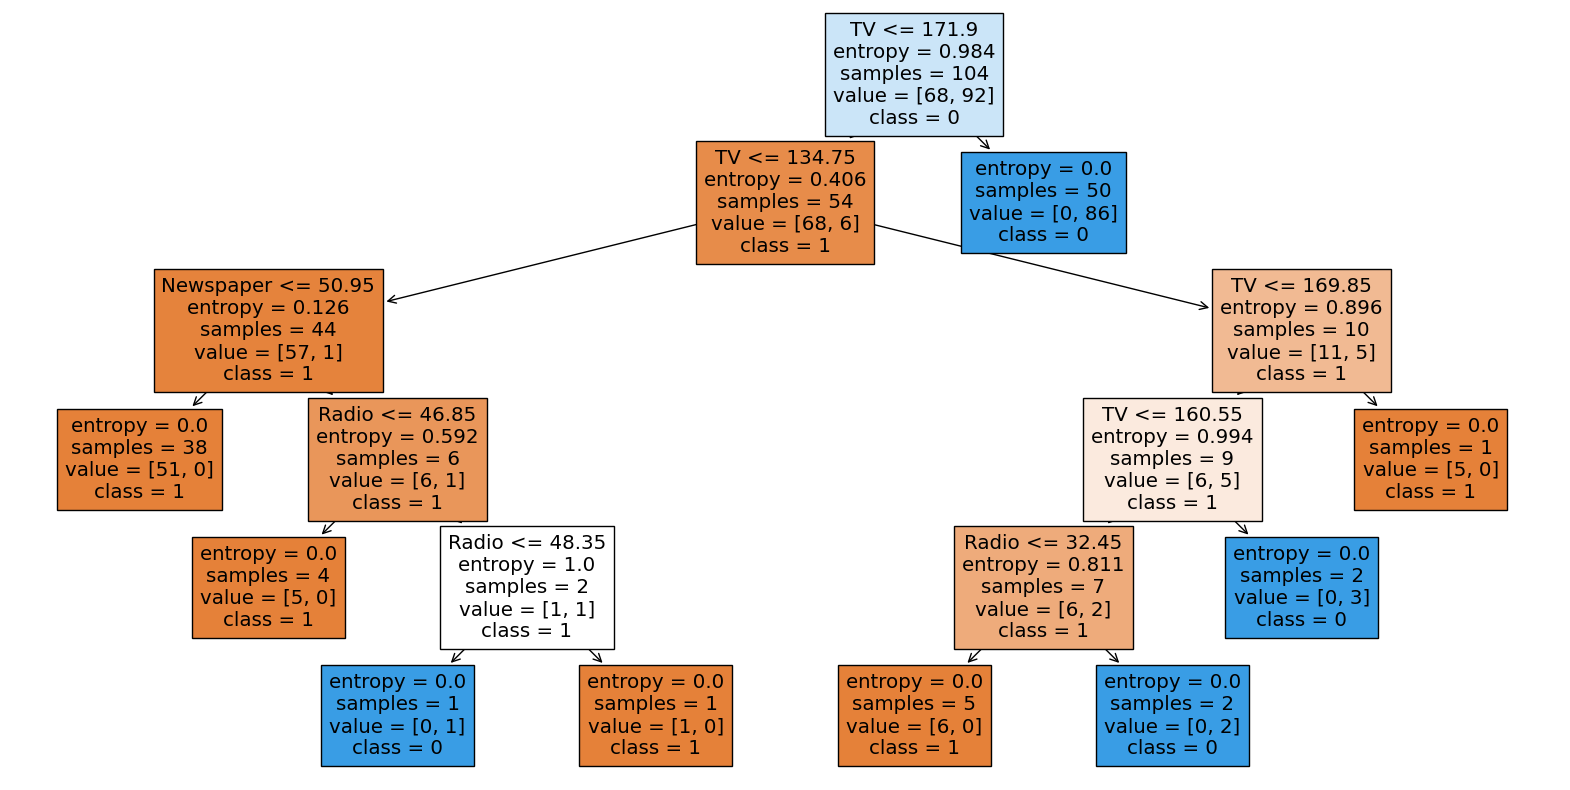

In [7]:
model=RandomForestClassifier(n_estimators=4,criterion='entropy')
model.fit(X_train,y_train)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'model' is your RandomForestClassifier
# Select one of the trees
tree = model.estimators_[2]  # You can change the index to view other trees

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=input.columns, class_names=['1','0'])
plt.show()